In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
homes = pd.read_csv('homes.csv')

In [4]:
homes.columns = ['Sell','List','Living','Rooms','Beds','Baths','Age','Acres','Taxes']

In [5]:
homes.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [55]:
homes.tail()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
45,129,135,10,6,3,1,15,1.00,2438
46,143,145,21,7,4,2,10,1.20,3529
47,247,252,29,9,4,2,4,1.25,4626
48,111,120,15,8,3,1,97,1.11,3205
49,133,145,26,7,3,1,42,0.36,3059


In [56]:
homes.describe()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


The data set includes details of houses like their selling price, list price, number of rooms, bedrooms, bathrooms, age of the house, acres and taxes. The above table shows various statistics of the dataset. We can see the costliest and cheapeast homes. Note-The selling price and list price are in thousands.

In [57]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    50 non-null     int64  
 1   List    50 non-null     int64  
 2   Living  50 non-null     int64  
 3   Rooms   50 non-null     int64  
 4   Beds    50 non-null     int64  
 5   Baths   50 non-null     int64  
 6   Age     50 non-null     int64  
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


We can see a summary of the dataset showing data types and missing values, if any. This can be seen as a pre cleaning step so we can learn more about our dataset. Our data set has 9 columns and 50 rows without any missing values, all of which are integer with 64 bit except Acres which is float with 64 bits.

In [58]:
homes.corr()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
List,0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


This gives the correlation of each of the variables against all others. The purpose of this is to get abasic understanding of which variable has the highest correlation with "Sell" i.e stringly related so we can use it for further analysis. We can see that Living has the highest correlation with the selling price after Taxes. (we ignore List as both List and Sell are values for the selling price itself)

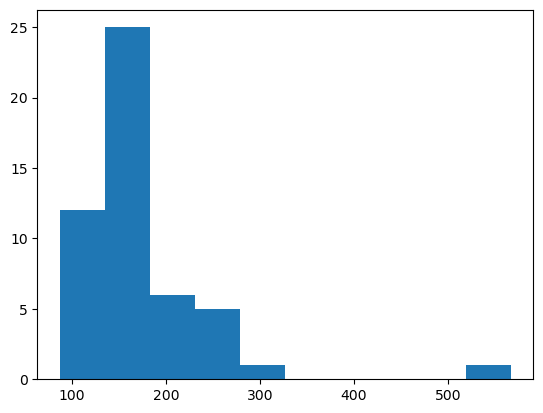

In [59]:
plt.hist(homes['Sell']);

This histogram of the dependent variable "Sell" gives us distribution of the selling price column. This helps us understand the frequency of houses sold in a particular price range and any outliers. This will help us for any further analysis. We can see that highest number of houses are sold between 100-200 and we have 1 outlier above 500.

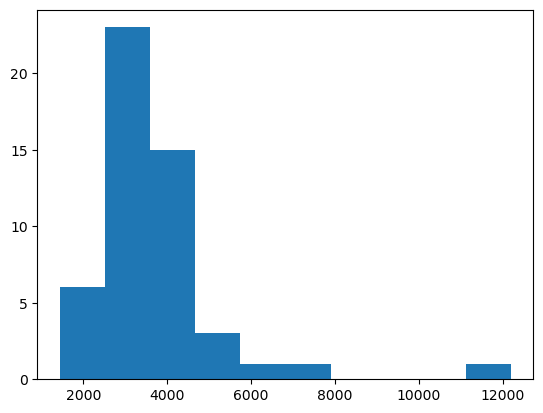

In [61]:
plt.hist(homes['Taxes']);

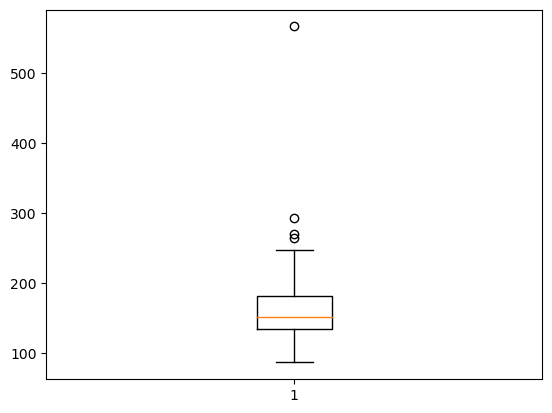

In [62]:
plt.boxplot(homes['Sell']);

In [5]:
homes_new = homes[homes['Sell'] < 240]

In [64]:
homes_new.describe()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,152.777778,159.555556,19.355556,7.888889,3.733333,1.755556,31.866667,1.038667,3329.866667
std,33.078343,34.426836,4.890415,1.191298,0.617914,0.679423,31.938577,1.251181,723.845526
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,133.000000,140.000000,17.000000,7.000000,3.000000,1.000000,13.000000,0.360000,3059.000000
50%,150.000000,157.000000,19.000000,8.000000,4.000000,2.000000,25.000000,0.520000,3363.000000
75%,175.000000,180.000000,22.000000,8.000000,4.000000,2.000000,41.000000,1.130000,3765.000000
max,234.000000,240.000000,39.000000,12.000000,5.000000,3.000000,202.000000,6.490000,5158.000000


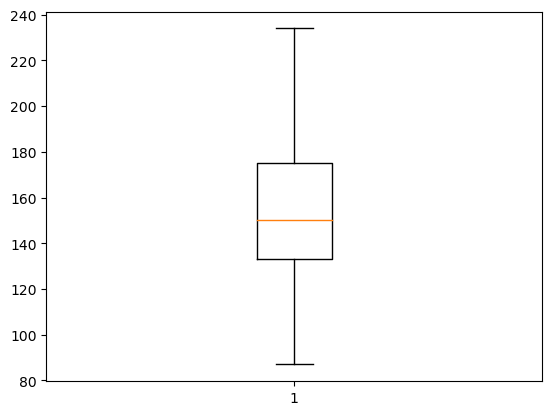

In [65]:
plt.boxplot(homes_new['Sell']);

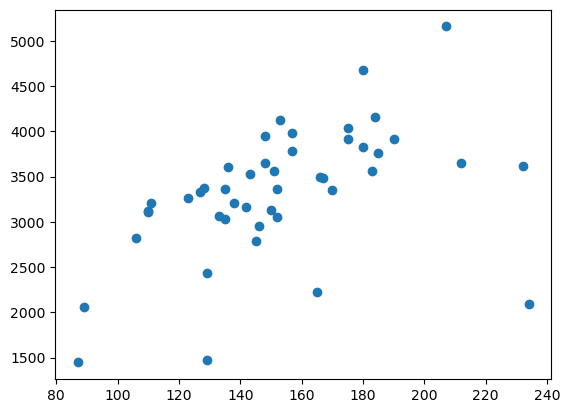

In [7]:
plt.scatter(homes_new['Sell'],homes_new['Taxes']);

In [6]:
y = homes['Sell']
x = homes['Taxes']
x = sm.add_constant(x)
x.head()

,const,Taxes
0,1.0,3167
1,1.0,4033
2,1.0,1471
3,1.0,3204
4,1.0,3613


In [7]:
model = sm.OLS(y,x).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        12:39:41   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
np.sqrt((((y) - model.predict(x)) **2 ).mean())

31.492964512226578

In [10]:
model.predict(x)

0     148.033175
1     183.898563
2      77.793340
3     149.565530
4     166.504264
5     142.276490
6     146.542235
7     230.490434
8     253.020193
9     101.938283
10    187.791572
11     76.716550
12    103.304978
13    133.579341
14    179.094423
15    108.813173
16    161.741539
17    166.255774
18    167.953789
19    164.350684
20    210.735481
21    310.421379
22    161.078899
23    179.218668
24    189.241097
25    173.627643
26    145.382615
27    156.150514
28    521.803524
29    175.532733
30    164.474929
31    172.799343
32    156.067684
33    180.461118
34    143.394695
35    139.046121
36    155.446460
37    154.949480
38    259.273857
39    181.786398
40    156.606079
41    146.045255
42    152.216090
43    167.953789
44    132.129816
45    117.841642
46    163.025404
47    208.457656
48    149.606945
49    143.560355
dtype: float64

In [5]:
ynew = homes_new['Sell']
xnew = homes_new['Taxes']
xnew = sm.add_constant(xnew)

In [6]:
model_new = sm.OLS(ynew,xnew).fit()

In [7]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     13.34
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           0.000700
Time:                        18:30:08   Log-Likelihood:                -214.72
No. Observations:                  45   AIC:                             433.4
Df Residuals:                      43   BIC:                             437.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.7304     20.736      3.797      0.000      36.913     120.548
Taxes          0.0222      0.006      3.653      0.001       0.010       0.035
==============================================================================
Omnibus:                       22.731   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.077
Skew:                           1.489   Prob(JB):                     5.39e-09
Kurtosis:                       6.383   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
np.sqrt((((ynew) - model_new.predict(xnew)) **2 ).mean())

28.57490385857727

In [32]:
model_new.predict(xnew)

0     149.156055
1     168.413598
2     111.441513
3     149.978837
4     159.073912
5     146.065064
6     148.355511
7     193.430615
9     124.405887
10    170.503909
11    110.863342
12    125.139719
13    141.395221
14    165.834066
15    128.097287
16    156.516617
17    158.940488
18    159.852219
19    157.917570
20    182.823400
22    156.160820
23    165.900778
24    171.282216
25    162.898736
26    147.732865
27    153.514575
29    163.921654
30    157.984282
31    162.453989
32    153.470101
33    166.567898
34    146.665472
35    144.330551
36    153.136540
37    152.869692
39    167.279494
40    153.759186
41    148.088662
42    151.402027
43    159.852219
44    140.616913
45    132.945028
46    157.205975
48    150.001074
49    146.754421
dtype: float64

In [16]:
reg = linear_model.LinearRegression()

In [11]:
reg.fit(xnew,ynew)

LinearRegression()

In [12]:
reg.coef_

array([0.        , 0.02223735])

In [13]:
reg.intercept_

78.73037414139729

In [14]:
reg.predict(xnew)[:10]

array([149.15605504, 168.41359835, 111.44151295, 149.97883692,
       159.07391222, 146.06506368, 148.35551052, 193.43061478,
       124.4058868 , 170.50390906])

In [15]:
mean_squared_error(ynew, reg.predict(xnew)) ** 0.5

28.574903858577272

Important statistics:
Coefficient = 0.022 - If taxes increase by 1 unit, the sale price increases by 0.022 units (for every 1000 units), other variables being constant.
Taxes is a good predictor of selling price since its p value is low.

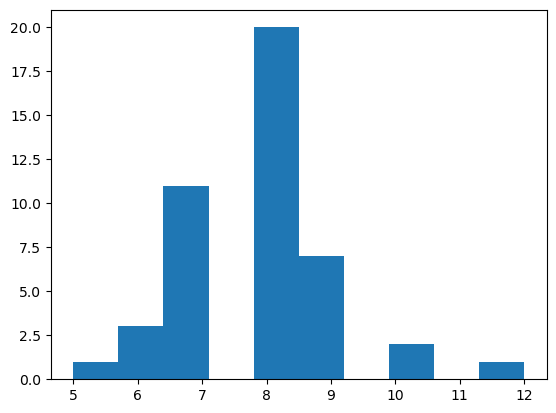

In [8]:
plt.hist(homes_new['Rooms']);

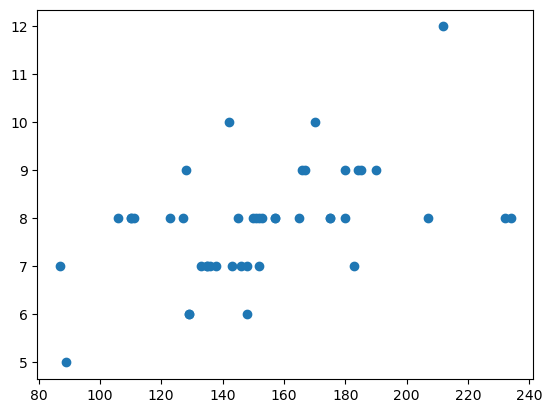

In [9]:
plt.scatter(homes_new['Sell'],homes_new['Rooms']);

In [10]:
y1 = homes_new['Sell']
x1 = homes_new['Rooms']
x1 = sm.add_constant(x1)
x1.head()

,const,Rooms
0,1.0,10
1,1.0,8
2,1.0,6
3,1.0,7
4,1.0,8


In [11]:
model2 = sm.OLS(y1,x1).fit()

In [12]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     12.42
Date:                Mon, 19 Feb 2024   Prob (F-statistic):            0.00102
Time:                        17:23:15   Log-Likelihood:                -215.09
No. Observations:                  45   AIC:                             434.2
Df Residuals:                      43   BIC:                             437.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.0712     29.750      1.649      0.106     -10.925     109.067
Rooms         13.1459      3.730      3.525      0.001       5.624      20.668
==============================================================================
Omnibus:                        4.681   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.522
Skew:                           0.515   Prob(JB):                        0.172
Kurtosis:                       3.904   Cond. No.                         54.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
np.sqrt((((y1) - model2.predict(x1)) **2 ).mean())

28.810664845804162

In [14]:
model2.predict(x1)

0     180.530249
1     154.238434
2     127.946619
3     141.092527
4     154.238434
5     141.092527
6     154.238434
7     154.238434
9     114.800712
10    154.238434
11    141.092527
12    154.238434
13    154.238434
14    154.238434
15    154.238434
16    167.384342
17    141.092527
18    141.092527
19    154.238434
20    167.384342
22    167.384342
23    167.384342
24    167.384342
25    154.238434
26    154.238434
27    141.092527
29    154.238434
30    141.092527
31    167.384342
32    154.238434
33    127.946619
34    141.092527
35    141.092527
36    180.530249
37    154.238434
39    154.238434
40    167.384342
41    154.238434
42    154.238434
43    206.822064
44    154.238434
45    127.946619
46    141.092527
48    154.238434
49    141.092527
dtype: float64

In [17]:
reg.fit(x1,y1)

LinearRegression()

In [18]:
reg.coef_

array([ 0.        , 13.14590747])

In [19]:
reg.intercept_

49.07117437722421

In [20]:
reg.predict(x1)[:10]

array([180.53024911, 154.23843416, 127.94661922, 141.09252669,
       154.23843416, 141.09252669, 154.23843416, 154.23843416,
       114.80071174, 154.23843416])

In [21]:
mean_squared_error(y1, reg.predict(x1)) ** 0.5

28.810664845804162

In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?

Important statistics:
Coefficient = 13.15 - If number of rooms increase by 1, the sale price increases by 13.15 units (for every 1000 units), other variables being constant.
Rooms is a good predictor of selling price since its p value is low.

Which model is "better"? What are some limitations of the model? 

It seems like the second model is better. The model considers only one independent variable where as in reality there are be many more variables for predicting price.